<a href="https://colab.research.google.com/github/adityasahu88/DL_PROJECTS/blob/main/cat_vs_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p /root/.kaggle
!mv kaggle.json /root/.kaggle

In [2]:
import kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download bhavikjikadara/dog-and-cat-classification-dataset

Dataset URL: https://www.kaggle.com/datasets/bhavikjikadara/dog-and-cat-classification-dataset
License(s): apache-2.0
 98% 757M/775M [00:11<00:00, 128MB/s] 
100% 775M/775M [00:12<00:00, 67.6MB/s]


In [4]:
# unzip files
!unzip -q dog-and-cat-classification-dataset.zip

In [5]:
# After unzip the files we receive the following directories
#|-- PetImages
#    |-- Cat
#    |-- Dog

In [6]:
import os
os.listdir("PetImages")

['Dog', 'Cat']

In [7]:
# No of cat & dog images
print(len(os.listdir("PetImages/Cat")))
print(len(os.listdir("PetImages/Dog")))


12499
12499


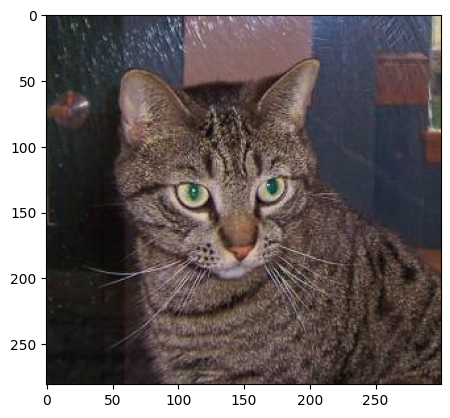

In [8]:
# check a sample image
import cv2
import matplotlib.pyplot as plt
img = cv2.imread("PetImages/Cat/1.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

['9535.jpg' '4521.jpg' '3267.jpg' '9276.jpg' '1948.jpg' '4396.jpg'
 '9595.jpg' '11800.jpg' '5046.jpg' '9672.jpg' '8966.jpg' '10176.jpg'
 '8219.jpg' '11838.jpg' '10524.jpg' '10852.jpg' '4613.jpg' '1822.jpg']
['2696.jpg' '11508.jpg' '8585.jpg' '1136.jpg' '4657.jpg' '6569.jpg'
 '383.jpg' '6262.jpg' '1025.jpg' '11012.jpg' '5626.jpg' '4983.jpg'
 '3170.jpg' '11239.jpg' '7996.jpg' '848.jpg' '446.jpg' '7921.jpg']


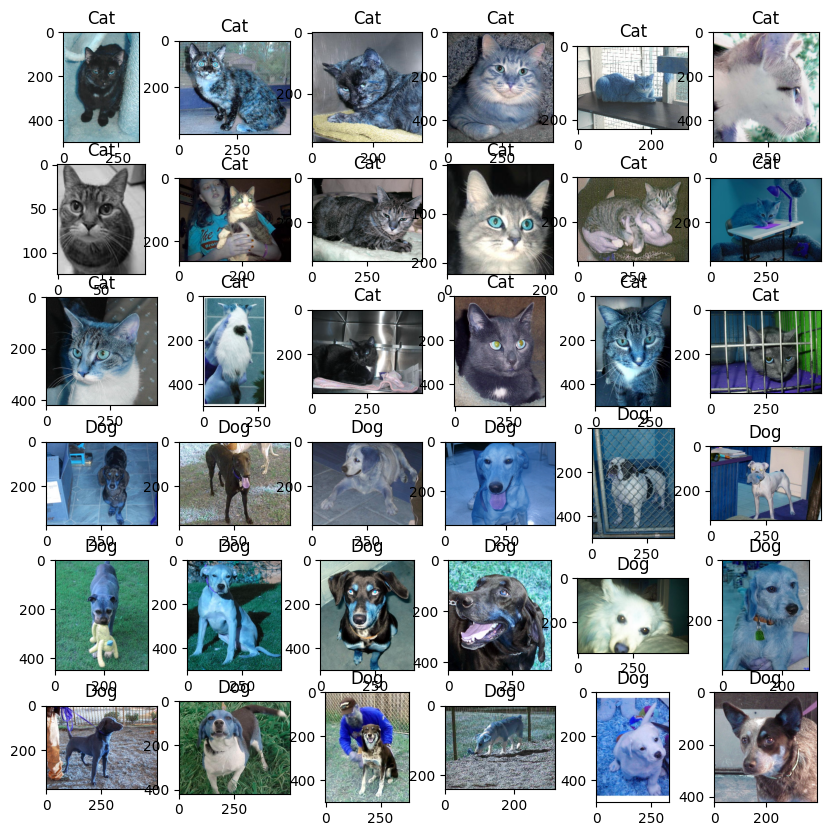

In [10]:
# lets display 6*6 sample cat and dog images
import shutil
import numpy as np

# Paths to the cat and dog folders
cat_path = "PetImages/Cat"
dog_path = "PetImages/Dog"

mix_list =[]

cat_images = np.random.choice(os.listdir(cat_path),18,replace=False)
dog_images = np.random.choice(os.listdir(dog_path),18,replace=False)

# display the cat images

print(cat_images)


# display the dog images
print(dog_images)

mix_list= list(cat_images)+list(dog_images)


# plot the images using matplotlib
plt.figure(figsize=(10,10))

for i in range(36):
  if i<18:
    img = cv2.imread(cat_path+"/"+cat_images[i])
    plt.subplot(6,6,i+1)
    plt.imshow(img)
    plt.title("Cat")
  else:
    img = cv2.imread(dog_path+"/"+dog_images[i-18])
    plt.subplot(6,6,i+1)
    plt.imshow(img)
    plt.title("Dog")

In [11]:
import shutil

cat_path = "PetImages/Cat"
dog_path = "PetImages/Dog"

cat_image = os.listdir(cat_path)
dog_image = os.listdir(dog_path)

# if a directory available then delete the directory and create the new director
if os.path.exists("images"):
  shutil.rmtree("images")

# lets create a parent Directory and copy all the files to the parent directo
!mkdir -p images
for  i in cat_image:
    # while copy the images lets rename the file in the target directory
    shutil.copy("PetImages/Cat/"+i,"images/"+"Cat_"+i.split(".")[0]+".jpg")

for  j in dog_image:
   shutil.copy("PetImages/Dog/"+j,"images/"+"Dog_"+j.split(".")[0]+".jpg")


In [12]:
# lets count the no of images in images directory
len(os.listdir("images"))


24998

In [13]:
# store the image name ,height, width,channel ,category in the dataframe
import pandas as pd
df =pd.DataFrame(columns =["image_name","height","width","channel","category"])


height = []
width = []
channel = []
category = []
image=[]
for i in os.listdir("images"):
    img = cv2.imread("images/"+i)
  # Check if the image is loaded successfully
    if img is not None:
      image.append(i)
      height.append(img.shape[0])
      width.append(img.shape[1])
      channel.append(img.shape[2])
      category.append(i.split("_")[0])

df["image_name"] = image
df["height"] = height
df["width"] = width
df["channel"] = channel
df["category"] = category

# Display 10 records
df.head(10)





,image_name,height,width,channel,category
0,Cat_5849.jpg,446,500,3,Cat
1,Cat_3157.jpg,187,249,3,Cat
2,Dog_10821.jpg,413,500,3,Dog
3,Dog_7267.jpg,270,259,3,Dog
4,Dog_5825.jpg,350,326,3,Dog
5,Dog_11618.jpg,375,500,3,Dog
6,Cat_6697.jpg,374,500,3,Cat
7,Dog_4728.jpg,500,441,3,Dog
8,Dog_12199.jpg,500,363,3,Dog
9,Cat_1990.jpg,375,500,3,Cat


In [14]:
# Check the class imbalance
df["category"].value_counts()

,count
category,
Cat,12476
Dog,12470


In [15]:
# find the height and width mean
df[["height","width"]].mean()

,0
height,361.201836
width,404.865750


- 1) The images are colored and 3 channels
- 2) The data have 2 categories Dog and Cat
- 3) The Dog have 12470 images and Cat have 12476 images
-4) All images are not of same shape i.e height and Weight
- 5) The mean of height and width of the image is 361 and 404 respectively


In [16]:
df.describe()

,height,width,channel
count,24946.000000,24946.00000,24946.0
mean,361.201836,404.86575,3.0
std,96.785672,108.69785,0.0
min,4.000000,4.00000,3.0
25%,302.000000,324.00000,3.0
50%,375.000000,448.00000,3.0
75%,421.000000,500.00000,3.0
max,500.000000,500.00000,3.0


In [ ]:
# Train DataSet
#  X_train and y_train
# num_of_images*height* width *channel  (24946*150*150*3)

In [ ]:
# if we run all the images we will get "Your session crashed after using all available RAM"
'''from tqdm.auto import tqdm
image_list =[]
for image_name in tqdm(os.listdir("images")):
    img = cv2.imread("images/"+image_name)
    if img is not None:
      img = cv2.resize(img,(150,150))
      img = img/255.0
      image_list.append(img)'''


In [17]:
# lets go for 3000 images where 3000 dog images and 3000 cat images

image_name = os.listdir("images")
dog_image = []
cat_image = []

for _image in image_name:
  if _image.split("_")[0]=="Dog":
    if len(dog_image)<1500:
      dog_image.append(_image)
    else :
      pass
  else:
    if len(cat_image)<1500:
      cat_image.append(_image)
    else:
      pass
dog_cat_image = dog_image+cat_image
print(len(dog_cat_image))


3000


- It is observed that the images are not of same shape. The height and the width of the images are of different sizes.
- The model expects the image should have same height and width .
- Therefore we can resize the images into a square matrix because the calculation becomes easier in case of square matrix i.e the height and the width of the image should be same
- After the resize the image we should normalize the images by dividing it by 255.0 so that the calculation becomes easier.
- To find the the same height and width we can use describe method of dataframe or take the mean of height and width of all the images.This is called the images preprocessing.
- Currently i am using 150*150 for height and width of all the image using resize method.
- We are using 6000 images because we are getting  " **Your session crashed after using all available RAM**". This is because we are loading all the images into the RAM and to handle such cases we can go for image batch processing.
- We need the image in the  RAM only when we are processing the model i.e when we fit the model then oly we need the images.
- Currenly we will work only on less images but we can use this will not be good model but here our objective  to create the  end to end model

In [18]:
from tqdm.auto import tqdm
image_list =[]
label_list=[]
for image_name in tqdm(dog_cat_image):
    img = cv2.imread("images/"+image_name)
    if img is not None:
      img = cv2.resize(img,(150,150))
      img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
      img = img/255.0
      image_list.append(img)
      if image_name.split("_")[0] =="Dog":
        label_list.append("1")
      else :
        label_list.append("0")


  0%|          | 0/3000 [00:00<?, ?it/s]

In [19]:
X = np.array(image_list)
Y = np.array(label_list)


In [20]:
X.shape  # No of images ,height ,width,channel

(2995, 150, 150, 3)

In [21]:
# slipt the data set into X_train,x_test,y_train,y_test
from sklearn.model_selection import train_test_split
# X-- x_train,x_test
# Y-- y_train,y_test
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [22]:
x_train.shape,y_train.shape

((2396, 150, 150, 3), (2396,))

In [23]:
x_test.shape,y_test.shape

((599, 150, 150, 3), (599,))

In [24]:
import tensorflow as tf
y_train =tf.keras.utils.to_categorical(y_train,num_classes=2)
y_test =tf.keras.utils.to_categorical(y_test,num_classes=2)

In [25]:
y_train.shape ,y_test.shape

((2396, 2), (599, 2))

In [26]:
150*150*3
# Here we are 6000 rows and 67500 columns or features

67500

In [27]:
# Lets Create the Model

model =tf.keras.models.Sequential()

# Add the Input layer
model.add(tf.keras.layers.Input(shape=(150,150,3),name="Input_layer"))
model.add(tf.keras.layers.Flatten(name="Flatten_layer"))
model.add(tf.keras.layers.Dense(128,activation="relu",name="Hidden_layer_1"))
model.add(tf.keras.layers.Dense(64,activation="relu",name="Hidden_layer_2"))
model.add(tf.keras.layers.Dense(2,activation="softmax",name="Output_layer"))
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Flatten_layer (Flatten)              │ (None, 67500)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_layer_1 (Dense)               │ (None, 128)                 │       8,640,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden_layer_2 (Dense)               │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output_layer (Dense)                 │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,648,514 (32.99 MB)

 Trainable params: 8,648,514 (32.99 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
# Above Model is having 8.6M parameters ie weights and bias

In [29]:
model.compile(optimizer =tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=["accuracy"])

In [30]:
model.fit(x_train,y_train,epochs=10,batch_size=32,validation_split=0.1)

Epoch 1/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - accuracy: 0.5140 - loss: 1.1960 - val_accuracy: 0.5208 - val_loss: 0.6922
Epoch 2/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.5693 - loss: 0.6831 - val_accuracy: 0.5125 - val_loss: 0.6944
Epoch 3/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 6s 79ms/step - accuracy: 0.5692 - loss: 0.6846 - val_accuracy: 0.5417 - val_loss: 0.6793
Epoch 4/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - accuracy: 0.5653 - loss: 0.6793 - val_accuracy: 0.4958 - val_loss: 0.6945
Epoch 5/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - accuracy: 0.5875 - loss: 0.6684 - val_accuracy: 0.5875 - val_loss: 0.6642
Epoch 6/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 7s 96ms/step - accuracy: 0.6107 - loss: 0.6661 - val_accuracy: 0.5583 - val_loss: 0.6852
Epoch 7/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 10s 93ms/step - accuracy: 0.6397 - loss: 0.6411 - val_accuracy: 0.5875 - val_loss: 0.6615
Epoch 8/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 9s 78ms/step - accuracy: 0.6382 - loss: 0.6464 - val_accuracy: 0.6083 - 

In [36]:
acc=model.history.history["accuracy"]
val_acc=model.history.history["val_accuracy"]
loss=model.history.history["loss"]
val_loss=model.history.history["val_loss"]

df_perform = pd.DataFrame({"accuracy":acc,"val_accuracy":val_acc,"loss":loss,"val_loss":val_loss})
df_perform.head(15)

,accuracy,val_accuracy,loss,val_loss
0,0.509276,0.520833,0.893746,0.692205
1,0.547774,0.512500,0.687296,0.694447
2,0.582096,0.541667,0.678320,0.679265
3,0.567718,0.495833,0.677693,0.694462
4,0.586271,0.587500,0.669085,0.664165
5,0.602968,0.558333,0.666327,0.685155
6,0.613173,0.587500,0.652886,0.661484
7,0.644249,0.608333,0.639911,0.650678
8,0.643785,0.625000,0.640441,0.637576
9,0.631262,0.620833,0.635340,0.641953


<ipython-input-39-22b5abd05451>:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


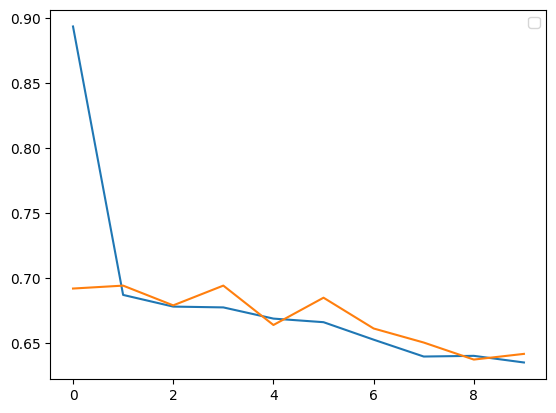

In [39]:
# lets plot the metrics
import matplotlib.pyplot as plt
plt.plot(df_perform[["loss"]])
plt.plot(df_perform[["val_loss"]])
plt.legend()
plt.show()

